In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

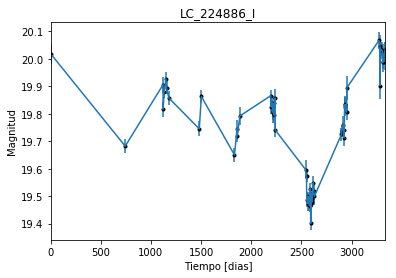

In [2]:
data = np.genfromtxt('LC_224886_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_224886_I')
plt.savefig("LC_224886_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

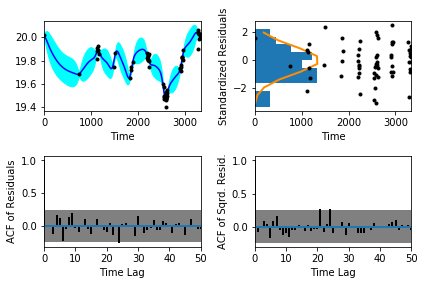

In [5]:
sample.assess_fit()

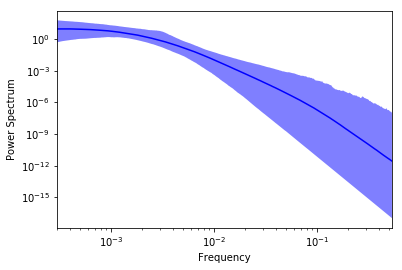

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

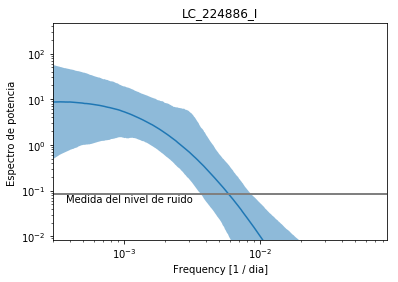

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_224886_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_224886_I')

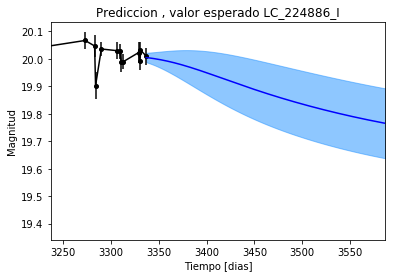

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_224886_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_224886_I')

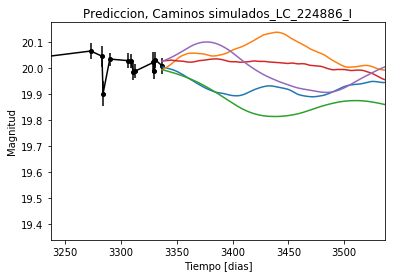

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_224886_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


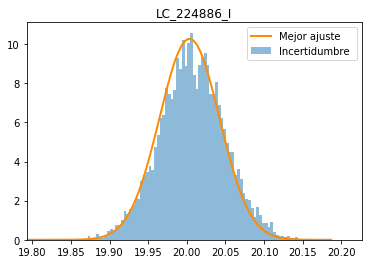

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_224886_I')
plt.savefig("Mejor_ajuste_LC_224886_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_224886_I')

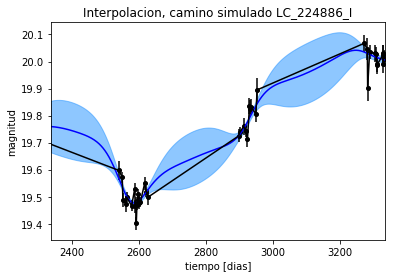

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_I')

Text(0.5,1,'Interpolacion, camino simulado LC_224886_I')

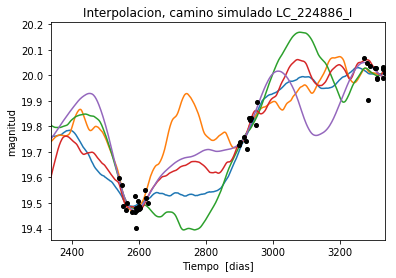

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 763.297365564
Median: 0.00466937949005
Standard deviation: 0.181378135043
68% credibility interval: [ 0.00069369  0.11653453]
95% credibility interval: [  3.56172035e-04   7.34788702e-01]
99% credibility interval: [  3.11561278e-04   9.64124186e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 741.853471039
Median: 0.00143465054245
Standard deviation: 0.0569448656442
68% credibility interval: [ 0.00049588  0.0098632 ]
95% credibility interval: [ 0.00032757  0.11038633]
99% credibility interval: [  3.04104903e-04   4.83704886e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 359.174035436
Median: 0.0141444148668
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 792.589116975
Median: 125.963944853
Standard deviation: 1.66743403542
68% credibility interval: [ 124.13656106  127.21783564]
95% credibility interval: [ 121.66166854  128.14613535]
99% credibility interval: [ 119.69827135  128.49288764]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 497.175552609
Median: 0.404594939565
Standard deviation: 1.94614962453
68% credibility interval: [ 0.05398286  2.99480743]
95% credibility interval: [ 0.01565488  6.69948333]
99% credibility interval: [ 0.01092586  8.6767949 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 357.591865666
Median: 0.0843090024455
Standard deviation: 7.19280930997
68% credibility interval: [  3.42224231e-03   3.48321472e+00]
95% credibility interval: [  6.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 9970.55625586
Median: 1.69067133528e-14
Standard deviation: 6.63661634653e+149
68% credibility interval: [  9.07124493e-75   9.28687272e+69]
95% credibility interval: [  2.12310856e-126   4.57675155e+134]
99% credibility interval: [  1.29835047e-173   9.35511069e+149]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2259.59218563
Median: 19.80708826
Standard deviation: 0.0730042849586
68% credibility interval: [ 19.75391661  19.87208075]
95% credibility interval: [ 19.68070603  19.97594204]
99% credibility interval: [ 19.59143628  20.07460254]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 490.116839198
Median: 0.00147993763364
Standard deviation: 0.207802785482
68% credibility interval: [ 0.          0.17782556]
95% credibility interval: [ 0.        0.811262]
99% credibility interval: [ 0.          1.02235412]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 490.116839198
Median: 0.00147993763364
Standard deviation: 0.207802785482
68% credibility interval: [ 0.          0.17782556]
95% credibility interval: [ 0.        0.811262]
99% credibility interval: [ 0.          1.02235412]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 511.747705689
Median: 0.0
Standard deviation: 0.00064064330464
68% credibili

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 792.589116975
Median: 125.963944853
Standard deviation: 1.66743403542
68% credibility interval: [ 124.13656106  127.21783564]
95% credibility interval: [ 121.66166854  128.14613535]
99% credibility interval: [ 119.69827135  128.49288764]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1669.04688784
Median: 0.0303017660899
Standard deviation: 0.0300668622262
68% credibility interval: [ 0.0188265   0.05377156]
95% credibility interval: [ 0.01244655  0.10730182]
99% credibility interval: [ 0.01010353  0.17864451]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1700.08302383
Median: 1.34345273727
Standard deviation: 0.209262128996
68% credibility interval: [ 1.15549658  1.57335283]
95% credibility interval: [ 1.00048457  1.81602915]
99% credibility interval: [ 0.91631464  1.94939566]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1755.46361028
Median: 1.88823145861e-05
Standard deviation: 0.0454671614259
68% credibility interval: [  2.18353770e-74   2.00228670e-03]
95% credibility interval: [  1.83438843e-138   2.71347997e-002]
99% credibility interval: [  4.11452147e-154   1.50581792e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 763.297365564
Median: (-0.0293385766055+0j)
Standard deviation: 1.73306636314
68% credibility interval: [-0.73220805 -1.99164687e+00j -0.00435856 -1.93291274e-03j]
95% credibility interval: [ -4.61681357e+00+0.j          -2.23789489e-03-0.00343404j]
99% credibility interval: [ -6.05777092e+00+0.j         -1.95759725e-03-2.0204886j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 741.853471039
Median: (-0.00901417520928+0.00882905744602j)
Standard deviation: 1.3537999486
68% credibility interval: [-0.06197233+0.10352738j -0.00311570+0.00053229j]
95% credibility interval: [-0.69357776 +3.04137258e+00j -0.00205816 +9.73900692e-04j]
99% credibility interval: [ -3.03920743e+00+2.05814179j  -1.91074746e-03+0.j        ]
Poste